### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
%matplotlib Qt

In [3]:
%matplotlib inline

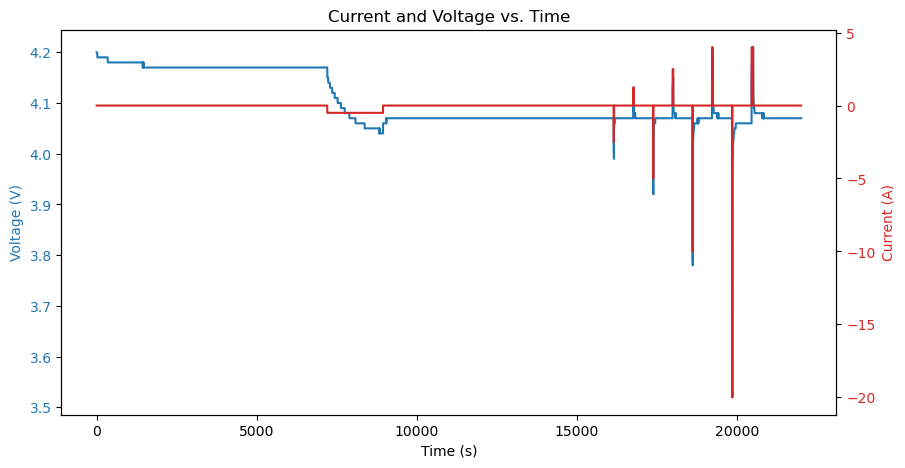

In [4]:
T0data = pd.read_csv('./data/Model_Training_Data_20.csv')
T0data = T0data[:int(len(T0data)/8)]
# T0data = T0data[int(len(T0data)/2):]

# plot current and voltage in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(T0data['Time (s)'], T0data['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)
ax2.plot(T0data['Time (s)'], T0data['Current (A)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Current and Voltage vs. Time')
plt.show()

In [5]:
SOC_PAD = 0 # indices
WINDOW = 8 # indices

argSOC = np.zeros((10,2)).astype(int)

i = 0
discharging = False
for j in range(len(T0data)-WINDOW):
    if not discharging and np.all(T0data['Current (A)'][j:j+WINDOW] != 0):
        argSOC[i,0] = j-SOC_PAD
        print(f"Discharging start: {j-WINDOW-SOC_PAD}")
        discharging = True
    elif discharging and np.all(T0data['Current (A)'][j:j+WINDOW] == 0):
        argSOC[i,1] = j+SOC_PAD
        print(f"Discharging end: {j+SOC_PAD}")
        discharging = False
        i += 1
    if i == 10:
        break

print(argSOC)

Discharging start: 7193
Discharging end: 8941
Discharging start: 16134
Discharging end: 16243
Discharging start: 22236
Discharging end: 22445
Discharging start: 28438
Discharging end: 28547
Discharging start: 34540
Discharging end: 34749
Discharging start: 40742
Discharging end: 40851
Discharging start: 46844
Discharging end: 47103
Discharging start: 53096
Discharging end: 53205
Discharging start: 59198
Discharging end: 59707
[[ 7201  8941]
 [16142 16243]
 [22244 22445]
 [28446 28547]
 [34548 34749]
 [40750 40851]
 [46852 47103]
 [53104 53205]
 [59206 59707]
 [    0     0]]


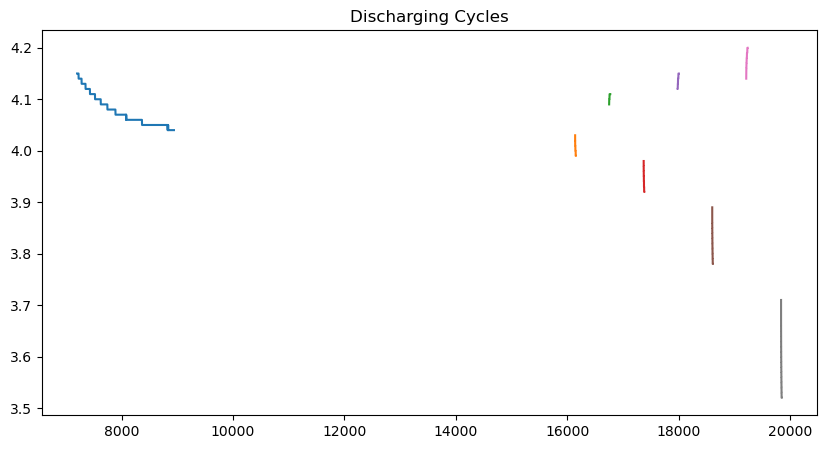

In [6]:
# plot all 8 discharging cycles
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(8):
    ax.plot(T0data['Time (s)'][argSOC[i,0]:argSOC[i,1]], T0data['Voltage (V)'][argSOC[i,0]:argSOC[i,1]])
plt.title('Discharging Cycles')
plt.show()

